In [58]:
import numpy as np
import pandas as pd
import math

from glob import glob
# import os
%pylab inline

import matplotlib.pyplot as pl

from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Выберем регион около Empire State Building: 1231 - 3
test_region = 1231-3

In [3]:
# %%time
# df = pd.DataFrame()
# files = glob('aggr_yellow_tripdata_????-??.bin')
# for fname in files:
#     df_tmp = pd.read_pickle(fname)
#     df = df.append(df_tmp[df_tmp['region'] == test_region])
#     print(fname)
    
# print('finish') 

In [3]:
# df.to_pickle('aggr_yellow_tripdata_w3.bin')
df = pd.read_pickle('aggr_yellow_tripdata_w3.bin')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21167 entries, 483727 to 1858727
Data columns (total 3 columns):
datetime    21167 non-null datetime64[ns, UTC]
region      21167 non-null int64
count       21167 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 661.5 KB


In [5]:
df.head()

,datetime,region,count
483727,2014-01-01 00:00:00+00:00,1228,863.0
906227,2014-01-01 01:00:00+00:00,1228,866.0
486227,2014-01-01 02:00:00+00:00,1228,888.0
908727,2014-01-01 03:00:00+00:00,1228,815.0
911227,2014-01-01 04:00:00+00:00,1228,718.0


In [6]:
dmin, dmax = df.datetime.min(), df.datetime.max()
print('Рассматриваемый интервал: {:%d.%m.%Y %H:%M} - {:%d.%m.%Y %H:%M}'.format(dmin, dmax))
print('расчетное количество часов в интервале: {:n}'.format( (dmax - dmin).total_seconds() / 3600 ))
print('Количество записей в DataFrame        : {:n}'.format(len(df)))

Рассматриваемый интервал: 01.01.2014 00:00 - 31.05.2016 23:00
расчетное количество часов в интервале: 21167
Количество записей в DataFrame        : 21167


In [7]:
df_plot = df.set_index('datetime')

In [8]:
# df_plot.resample('M').mean().head

In [81]:
# Индекс имеет тип DatetimeIndex, а у класса DatetimeIndex есть переменная-член date
# Вырезаем данные за год.
s = df_plot.loc[(df_plot.index.date >= datetime.date(2015, 5, 1)) & 
                (df_plot.index.date < datetime.date(2016, 5, 1))]

In [10]:
s.head()

,region,count
datetime,,
2015-05-01 00:00:00+00:00,1228,677.0
2015-05-01 01:00:00+00:00,1228,452.0
2015-05-01 02:00:00+00:00,1228,338.0
2015-05-01 03:00:00+00:00,1228,224.0
2015-05-01 04:00:00+00:00,1228,217.0


/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


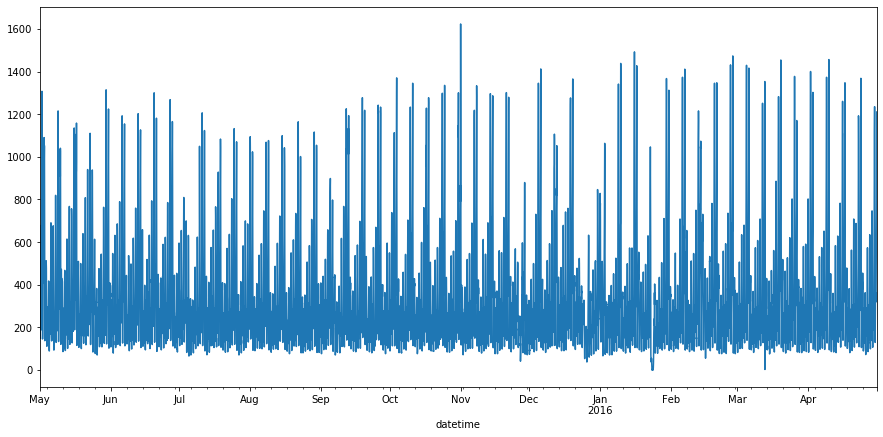

In [11]:
plt.figure(figsize(15,7))
# s['count'].plot()
stmp = s.resample('D').mean()
s['count'].plot();

Курс 5 - Прогнозирование временных рядов  
1-1.Prognozirovanie-vremennyh-ryadov.pdf


dminik5_w1_01

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/

https://habr.com/ru/post/207160/

Основная сложность работы с такими рядами, как в нашем проекте, заключается в том, как учесть сложную структуру сезонности — суточной, недельной и годовой. В рамках моделей ARIMA можно учесть только одну из них. Обычно в таких случаях **сезонность с самым маленьким периодом явно моделируют с помощью аримы, а все остальные учитывают за счёт регрессионной компоненты.**

In [12]:
s_diff = s['count'].diff()

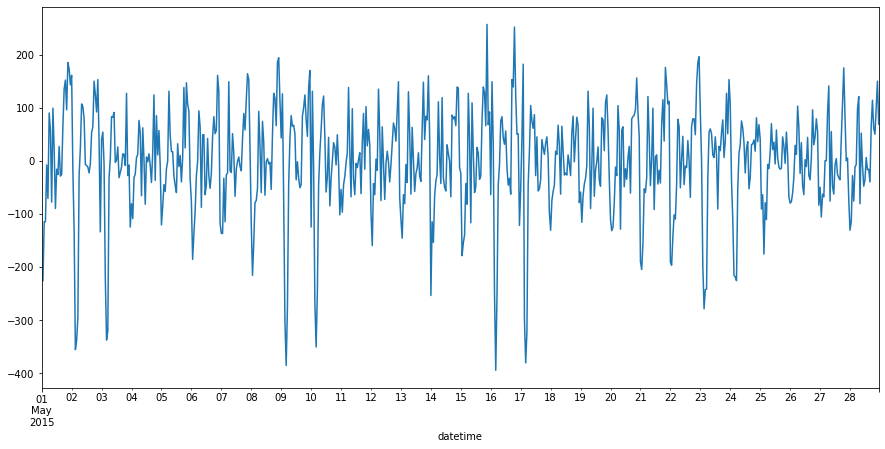

In [26]:
# s_diff.resample('D').mean().head(100).plot();
s_diff.head(28*24).plot();

In [53]:
# stmp = s_diff.head(28*24)
stmp = s.head(28*24)['count']

In [54]:
stmp.head()

datetime
2015-05-01 00:00:00+00:00    677.0
2015-05-01 01:00:00+00:00    452.0
2015-05-01 02:00:00+00:00    338.0
2015-05-01 03:00:00+00:00    224.0
2015-05-01 04:00:00+00:00    217.0
Name: count, dtype: float64

In [32]:
len(stmp)

672

In [33]:
# X_week = []
# ibeg = 0
# for k in range(2, 6):
#     X_week.append([ math.sin(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
#     X_week.append([ math.cos(i* 2.*math.pi*k/168) for i in range(ibeg, len(stmp) + ibeg)])
        

In [111]:
# atmp = np.array( X_week )
# atmp.shape
stmp = s.head(28*24)['count']
# stmp.head()

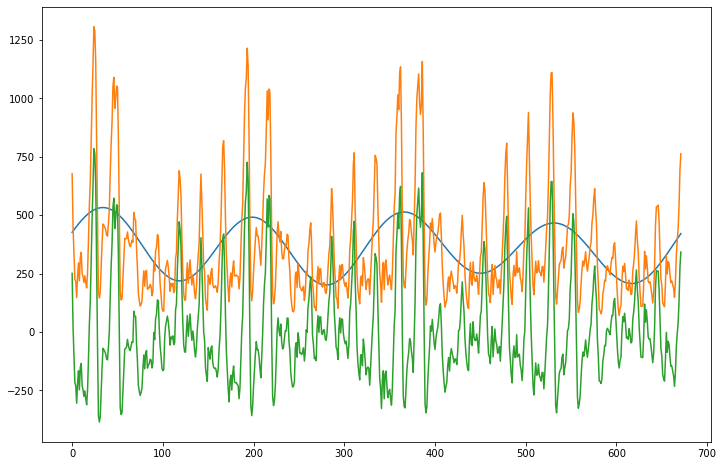

In [114]:
pl.figure(figsize=(12,8))
t_period = 28*24
l_score = []
Kmax = 5
for ibeg in range(0, 1):
    X_week = []
    for i in range(ibeg, len(stmp) + ibeg):
        X_week.append([ math.sin(i* 2.*math.pi*k/t_period) for k in range(2, Kmax+1)] + 
                      [ math.cos(i* 2.*math.pi*k/t_period) for k in range(2, Kmax+1)])
        
    lr = LinearRegression()
    lr.fit( X_week , stmp.values)
    l_score.append(lr.score(X_week , stmp.values))
    y_test = lr.predict(X_week)

#     stmp.plot()
    pl.plot(y_test)
    pl.plot(stmp.values)
    pl.plot(stmp.values - y_test)

In [76]:
print(min(l_score))
print(max(l_score))b

0.054724562980094205
0.05472456298009443


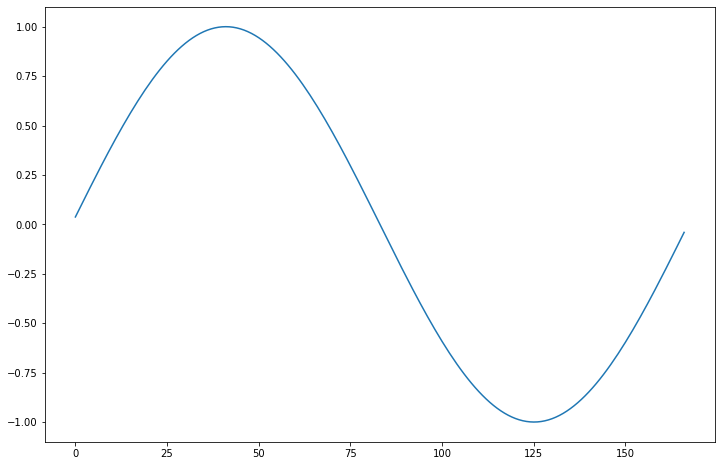

In [102]:
pl.figure(figsize=(12,8))
t_period = 24*7
tmp = [math.sin(2*3.14*i/t_period) for i in range(1, t_period)]
plt.plot(tmp);

In [47]:
lr = LinearRegression(multioutput='uniform_average')
lr.fit( X_week , stmp.values)

TypeError: __init__() got an unexpected keyword argument 'multioutput'

In [38]:
lr.coef_

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [ 16.65621642, -23.33659136,  12.80854311, -23.88313916,
        -75.23661285,   6.24595665,  -1.69877779, -35.07986357]])

In [39]:
lr.intercept_ 

array([1228.        ,  329.05927156])

In [41]:
lr.score(X_week , stmp.values)

/home/adm-net/anaconda2/envs/py37/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.0728638518079836